<a href="https://colab.research.google.com/github/akesaverdhen/EDA_Project_22BDS0022/blob/main/22BDS0022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================================
# Reg. No.     : 22BDS0022
# Name         : Kesaverdhen A
# Dataset Link : https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv
# Github Link  : https://github.com/akesaverdhen/EDA_Project_22BDS0022
# ============================================================


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (8,5)
pd.set_option("display.max_columns", 100)

In [3]:
URL = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indo_rct.csv"
df = pd.read_csv(URL)

print("Dataset loaded ✓")
print(f"Shape (rows, cols): {df.shape}")
display(df.head())


Dataset loaded ✓
Shape (rows, cols): (602, 34)


,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,psphinc,precut,difcan,pneudil,amp,paninj,acinar,brush,asa81,asa325,asa,prophystent,therastent,pdstent,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN


In [4]:
# --- 2) Dimensions & Structure ---
print("\n=== Dimensions ===")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])

print("\n=== Column dtypes ===")
display(df.dtypes)

print("\n=== Sample info() (non-null counts) ===")
df.info()


=== Dimensions ===
Rows: 602 | Columns: 34

=== Column dtypes ===


,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object



=== Sample info() (non-null counts) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     602 non-null    int64  
 1   id           602 non-null    int64  
 2   site         602 non-null    object 
 3   age          602 non-null    int64  
 4   risk         602 non-null    float64
 5   gender       602 non-null    object 
 6   outcome      602 non-null    object 
 7   sod          602 non-null    object 
 8   pep          602 non-null    object 
 9   recpanc      602 non-null    object 
 10  psphinc      602 non-null    object 
 11  precut       602 non-null    object 
 12  difcan       602 non-null    object 
 13  pneudil      602 non-null    object 
 14  amp          602 non-null    object 
 15  paninj       602 non-null    object 
 16  acinar       602 non-null    object 
 17  brush        602 non-null    object 
 18  asa81    

In [5]:
# --- 3) Basic Summary Statistics ---
print("\n=== Summary statistics (numeric) ===")
display(df.describe().T)



=== Summary statistics (numeric) ===


,count,mean,std,min,25%,50%,75%,max
rownames,602.0,301.500000,173.926709,1.0,151.25,301.5,451.75,602.0
id,602.0,1939.425249,568.733133,1001.0,1152.25,2137.5,2288.75,4003.0
age,602.0,45.269103,13.297968,19.0,35.00,45.0,54.00,90.0
risk,602.0,2.381229,0.881269,1.0,1.50,2.5,3.00,5.5
bleed,27.0,1.592593,0.500712,1.0,1.00,2.0,2.00,2.0


In [6]:
# Non-numeric quick peek
non_num_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if non_num_cols:
    print("\n=== Example value counts for first few categorical columns ===")
    for c in non_num_cols[:5]:
        print(f"\n-- {c} --")
        display(df[c].value_counts().head(10))



=== Example value counts for first few categorical columns ===

-- site --


,count
site,
2_IU,413
1_UM,164
3_UK,22
4_Case,3



-- gender --


,count
gender,
1_female,476
2_male,126



-- outcome --


,count
outcome,
0_no,523
1_yes,79



-- sod --


,count
sod,
1_yes,495
0_no,107



-- pep --


,count
pep,
0_no,506
1_yes,96


In [7]:
# --- 4) Data Handling & Cleaning ---

# 4.1 Standardize column names (snake_case)
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"[^\w\s]", "", regex=True)
      .str.replace(r"\s+", "_", regex=True)
      .str.lower()
)

In [8]:
# 4.2 Try to coerce anything that "looks numeric" but is stored as object into numeric
for col in df.columns:
    if df[col].dtype == "object":
        # if majority of values are numeric-ish, coerce
        sample = df[col].dropna().astype(str).str.replace(",","").str.replace(" ","")
        numericish = sample.str.replace(".","",1).str.replace("-","",1).str.isnumeric()
        if numericish.mean() > 0.6:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(",",""), errors="coerce")


In [9]:
# 4.3 Try to parse obvious date columns (heuristic)
for col in df.columns:
    if df[col].dtype == "object":
        try:
            parsed = pd.to_datetime(df[col], errors="raise", infer_datetime_format=True)

            if parsed.notna().mean() > 0.8:
                df[col] = parsed
        except Exception:
            pass

print("\nAfter dtype coercion:")
display(df.dtypes)



After dtype coercion:


,0
rownames,int64
id,int64
site,object
age,int64
risk,float64
gender,object
outcome,object
sod,object
pep,object
recpanc,object


In [10]:
# 4.6 Outlier flagging (IQR rule) for numeric columns
df_clean = df.copy()

# Function to count IQR-based outliers
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

num_cols = df_clean.select_dtypes(include='number').columns
outlier_summary = {}
for c in num_cols:
    outlier_summary[c] = iqr_outliers(df_clean[c]).sum()
outlier_summary

{'rownames': np.int64(0),
 'id': np.int64(3),
 'age': np.int64(1),
 'risk': np.int64(1),
 'bleed': np.int64(0)}

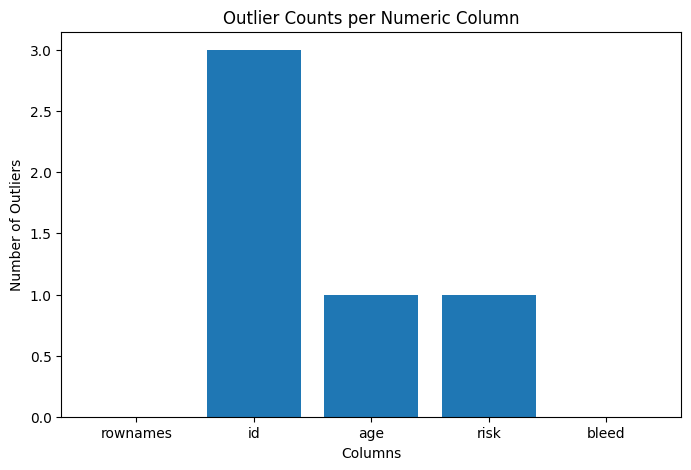

In [11]:
#bar chart
import matplotlib.pyplot as plt

plt.bar(outlier_summary.keys(), outlier_summary.values())
plt.ylabel("Number of Outliers")
plt.xlabel("Columns")
plt.title("Outlier Counts per Numeric Column")
plt.show()

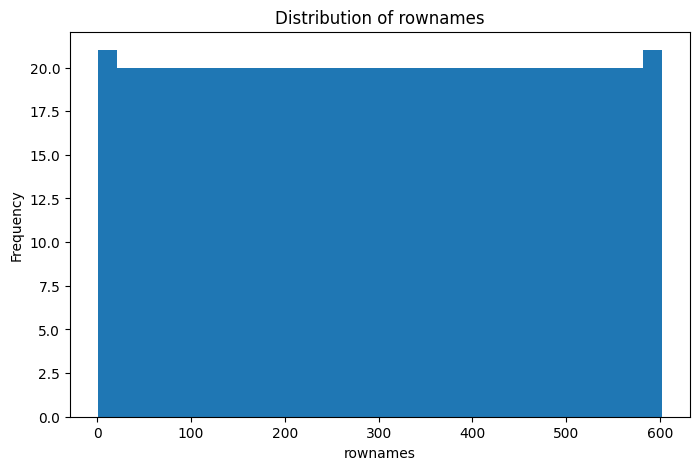

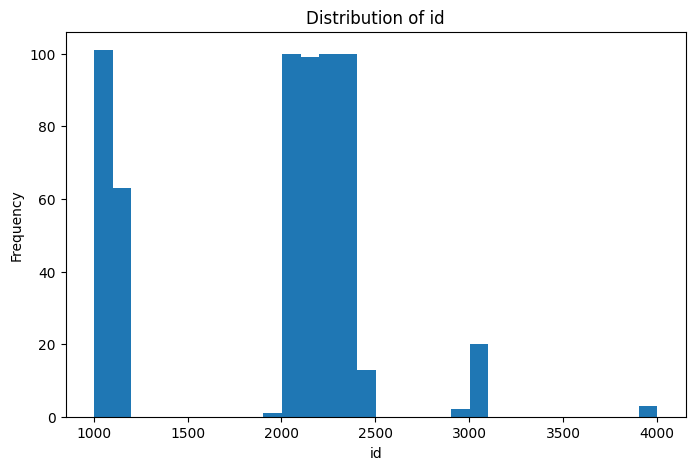

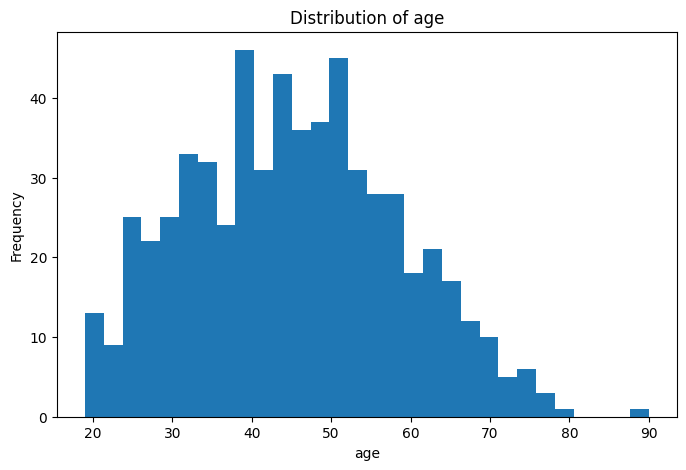

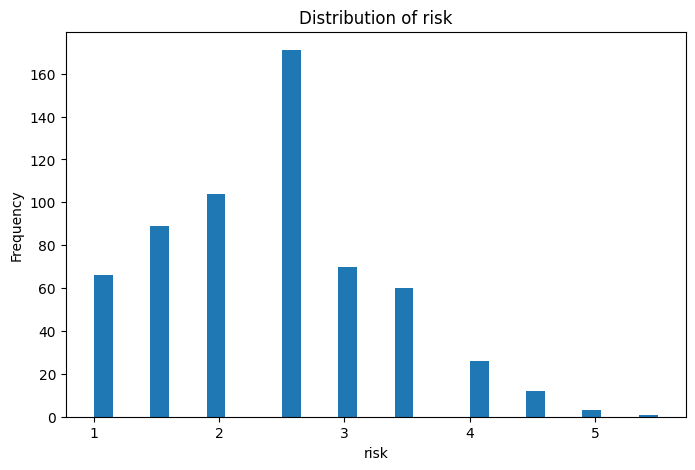

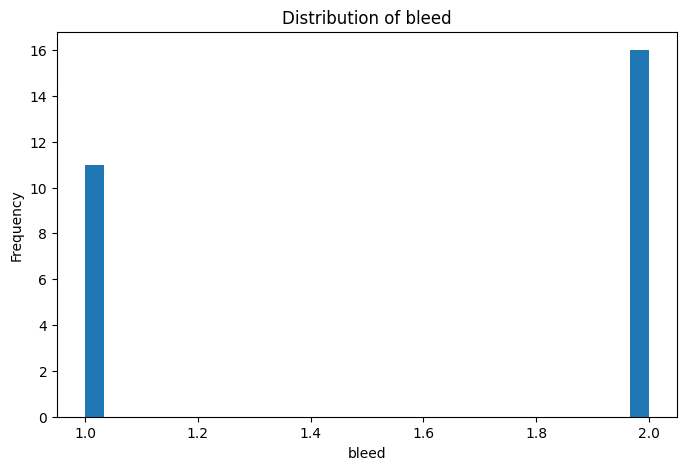

In [12]:
# --- 5) Univariate Analysis ---
df_clean = df.copy()
num_cols = df_clean.select_dtypes(include='number').columns.tolist()


# 5.1 Histograms for numerical columns (capped to first 10 for brevity)
plot_num = num_cols[:10]
if len(plot_num) > 0:
    for c in plot_num:
        plt.figure()
        plt.hist(df_clean[c].dropna(), bins=30)
        plt.title(f"Distribution of {c}")
        plt.xlabel(c)
        plt.ylabel("Frequency")
        plt.show()


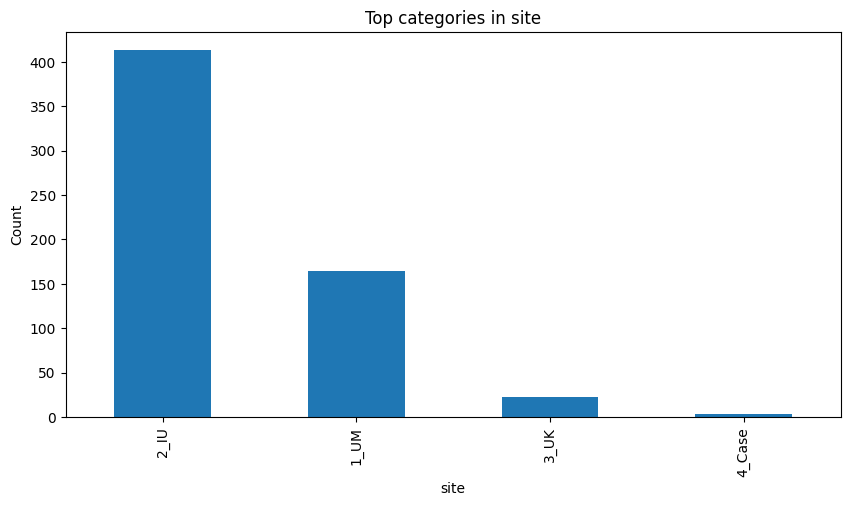

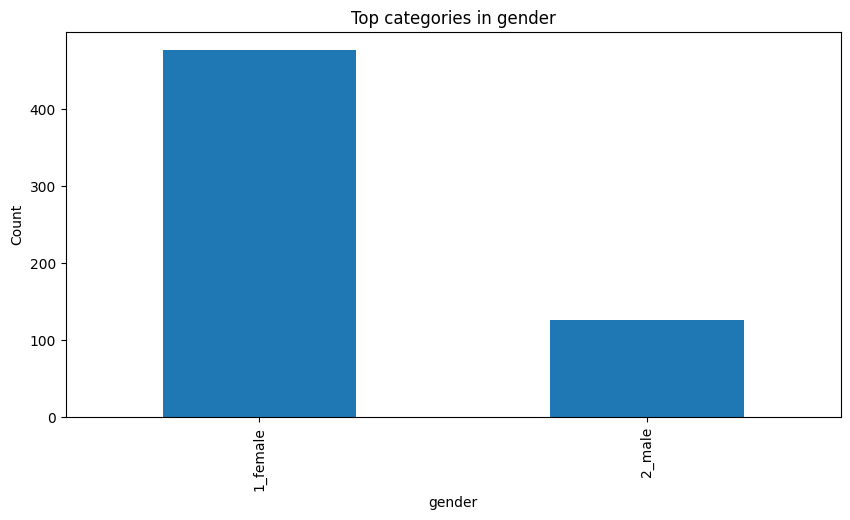

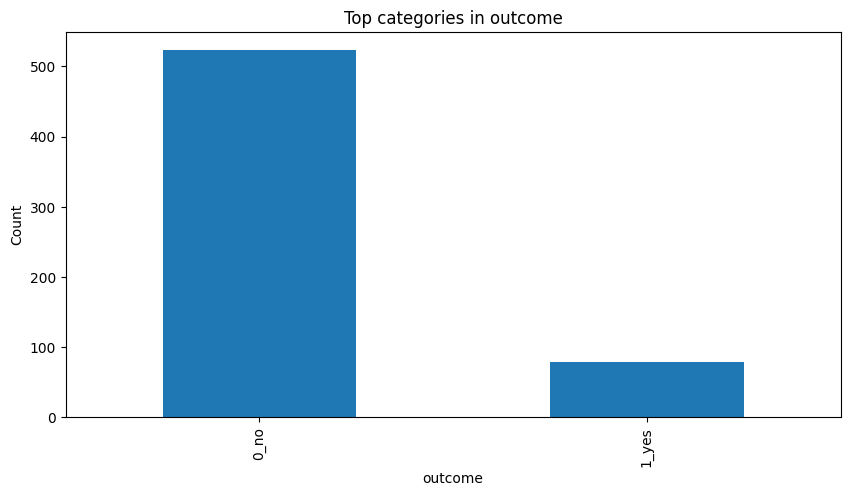

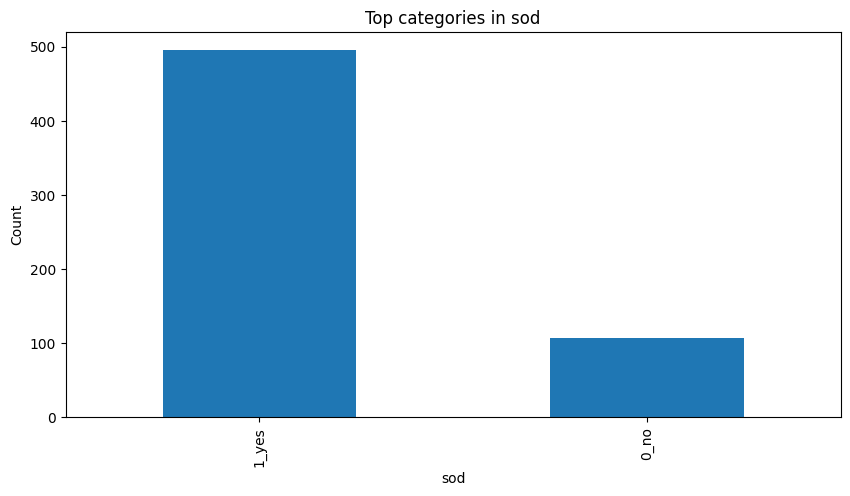

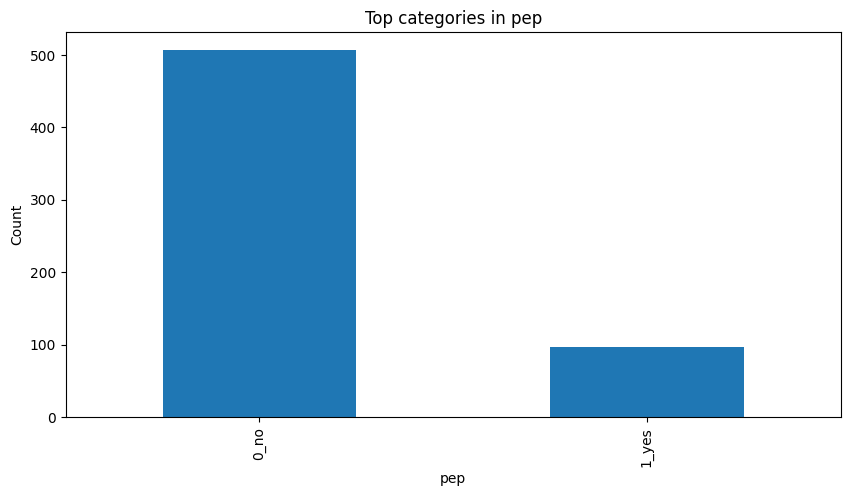

In [13]:
# 5.2 Bar plots for top categories (first 5 categorical columns)

df_clean = df.copy()
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()


plot_cat = cat_cols[:5]
for c in plot_cat:
    plt.figure(figsize=(10,5))
    df_clean[c].value_counts().head(15).plot(kind="bar")
    plt.title(f"Top categories in {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df_clean = df.copy()

num_cols = df_clean.select_dtypes(include='number').columns.tolist()
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()


=== Top correlated numeric pairs (abs value) ===
id vs rownames | corr=0.897


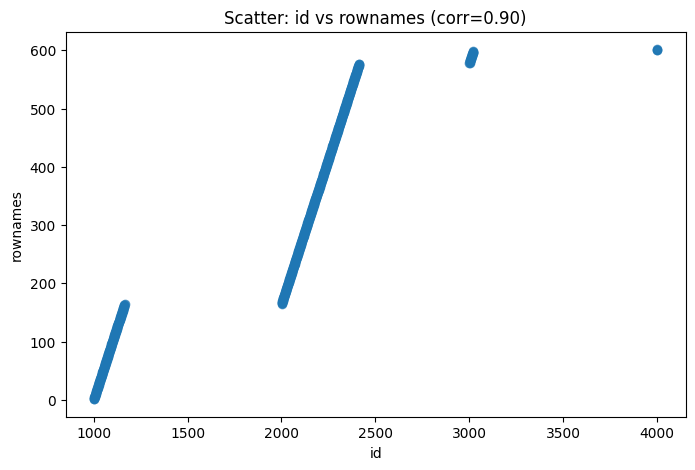

age vs bleed | corr=-0.418


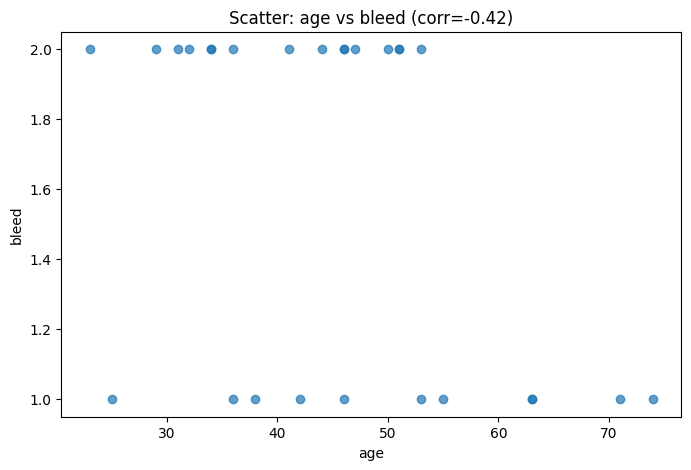

bleed vs id | corr=-0.266


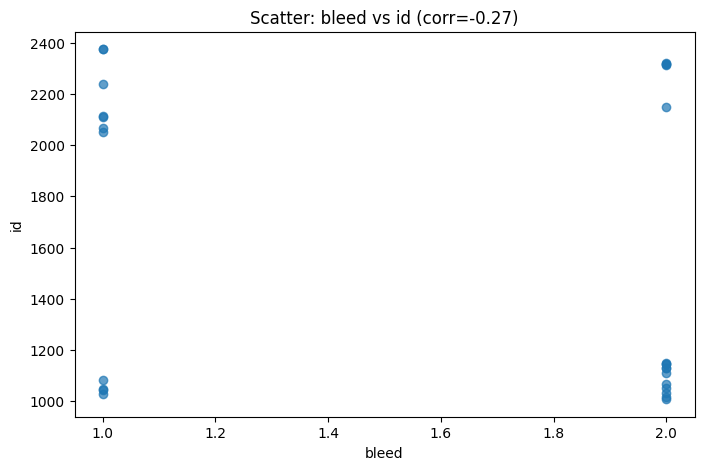

age vs risk | corr=-0.217


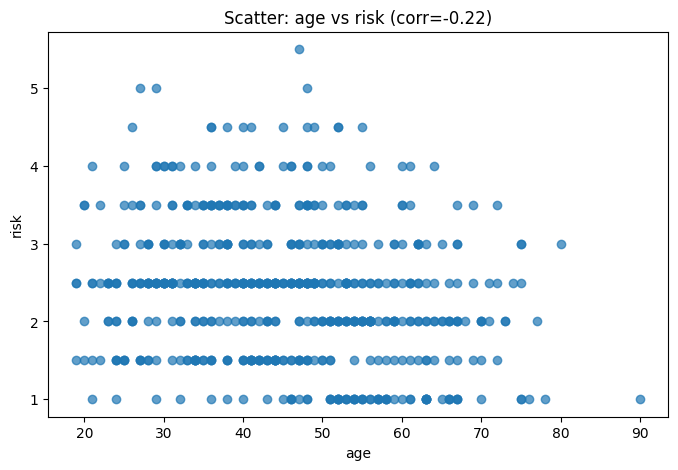

id vs risk | corr=0.167


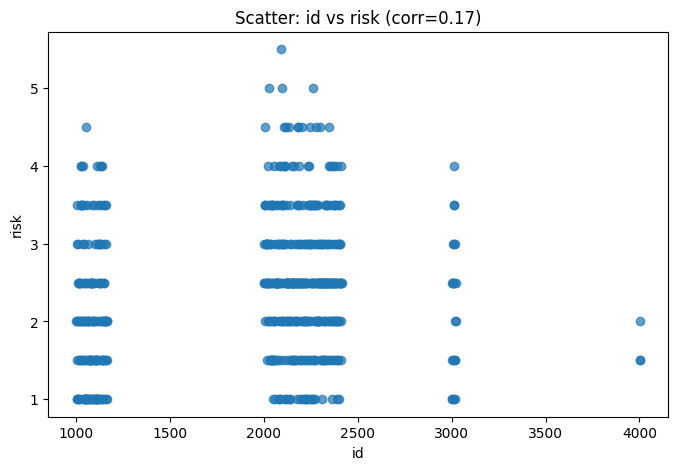

In [15]:
# 6.1 Correlation with top numeric pairs (scatter)
if len(num_cols) >= 2:
    # Compute correlations
    corr = df_clean[num_cols].corr(numeric_only=True)

    corr_pairs = (
        corr.where(~np.eye(corr.shape[0], dtype=bool))
            .stack()
            .abs()
            .sort_values(ascending=False)
    )
    top_pairs = [(a,b) for (a,b) in corr_pairs.index if a < b][:5]

    print("\n=== Top correlated numeric pairs (abs value) ===")
    for a,b in top_pairs:
        print(f"{a} vs {b} | corr={corr.loc[a,b]:.3f}")
        plt.figure()
        plt.scatter(df_clean[a], df_clean[b], alpha=0.7)
        plt.title(f"Scatter: {a} vs {b} (corr={corr.loc[a,b]:.2f})")
        plt.xlabel(a); plt.ylabel(b)
        plt.show()

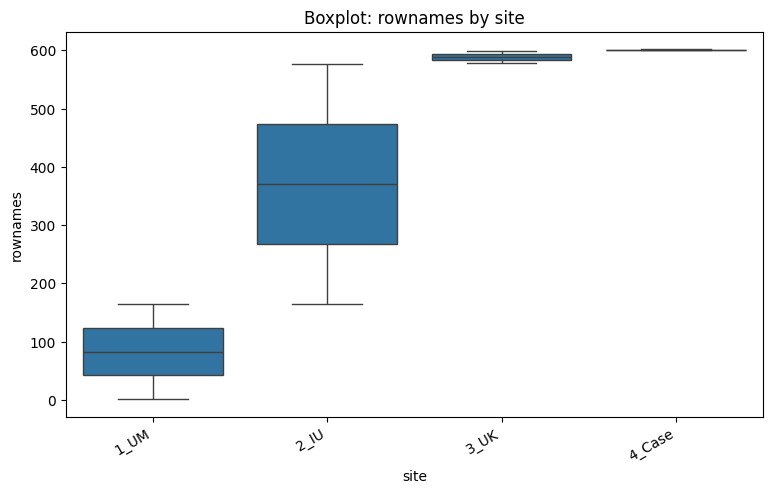

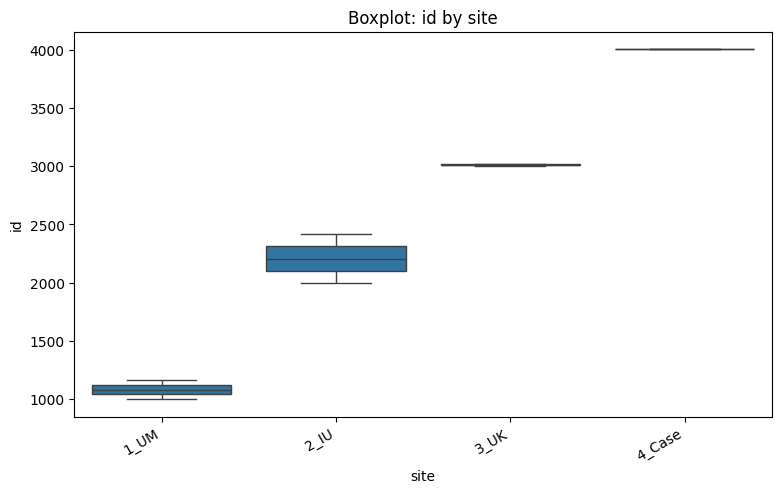

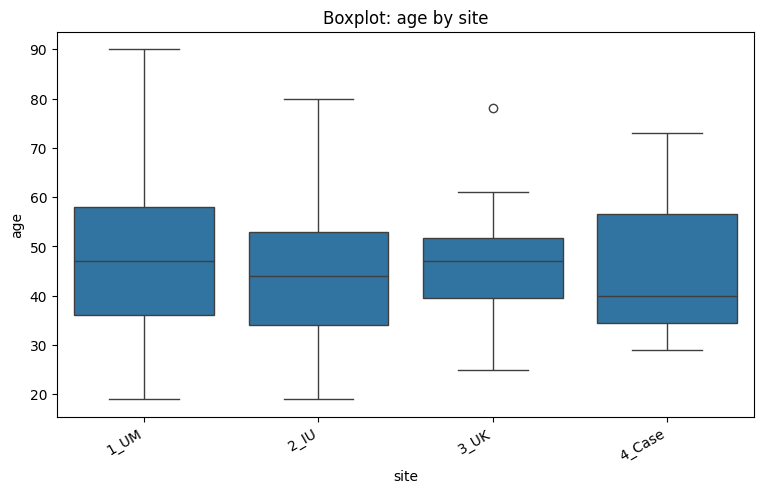

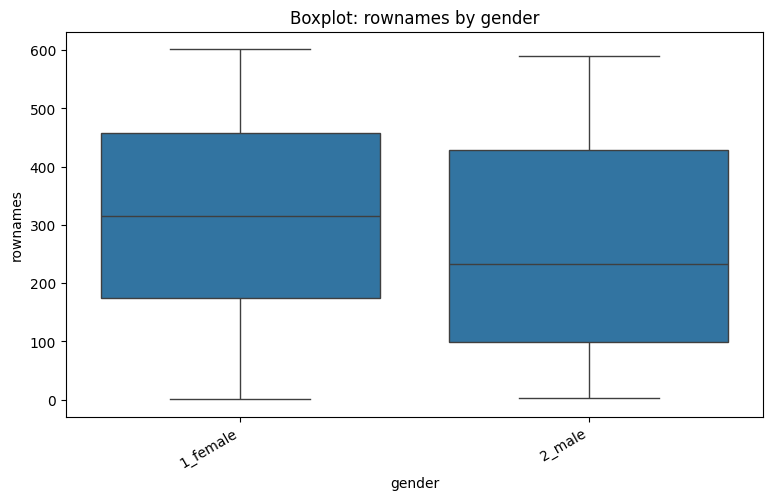

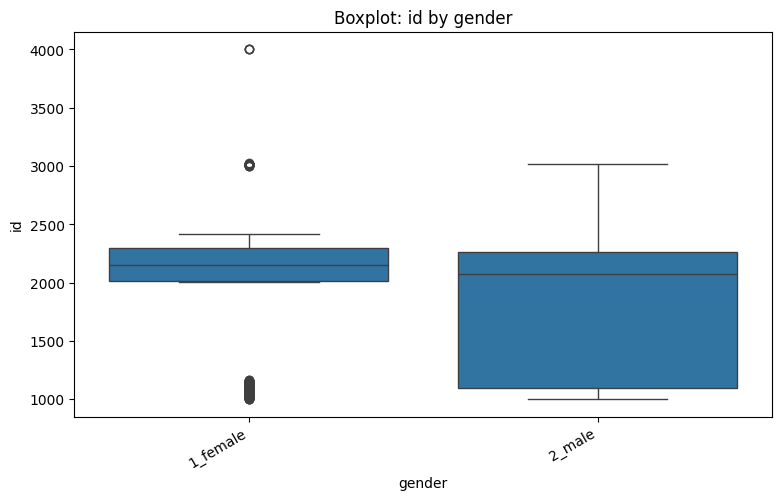

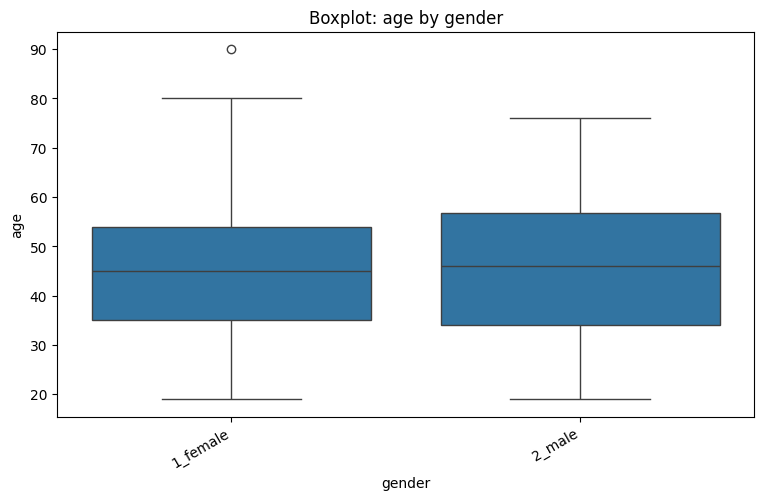

In [16]:
# 6.2 Boxplots: numerical vs categorical (first 2 cat × first 3 num)
for c in cat_cols[:2]:
    for n in num_cols[:3]:
        plt.figure(figsize=(9,5))
        sns.boxplot(x=df_clean[c], y=df_clean[n])
        plt.title(f"Boxplot: {n} by {c}")
        plt.xticks(rotation=30, ha="right")
        plt.show()


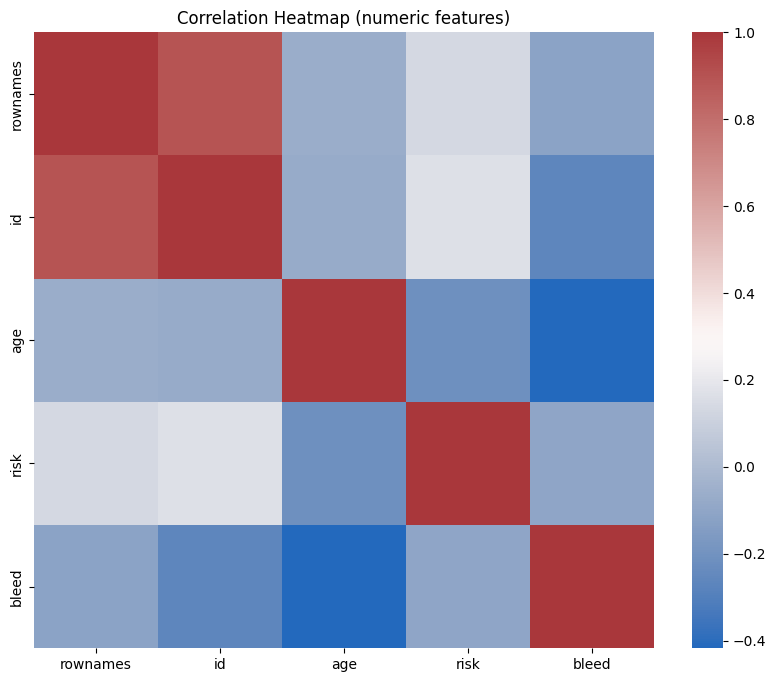

In [17]:
# --- 7) Multivariate Analysis (CO5) ---

# 7.1 Correlation Heatmap
if num_cols:
    corr_all = df_clean[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_all, cmap="vlag", annot=False)
    plt.title("Correlation Heatmap (numeric features)")
    plt.show()

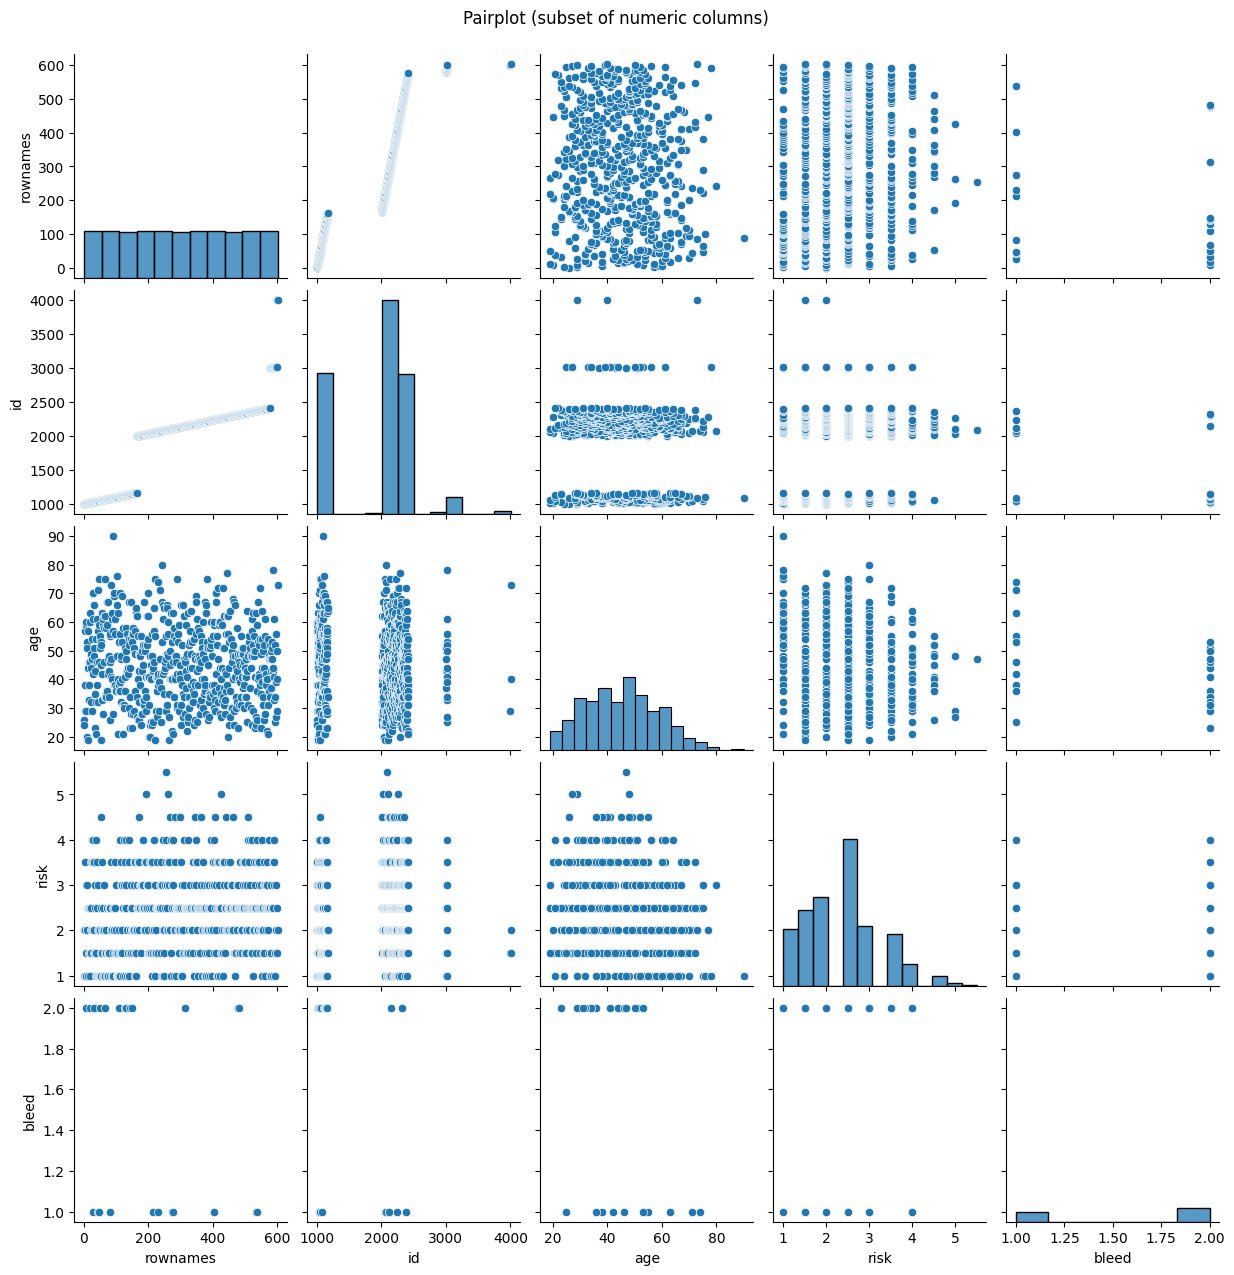

In [18]:
# 7.2 Pairplot for a subset of numeric columns (up to 6 to keep it readable)
sub_nums = num_cols[:6]
if len(sub_nums) >= 2:
    sns.pairplot(df_clean[sub_nums], diag_kind="hist")
    plt.suptitle("Pairplot (subset of numeric columns)", y=1.02)
    plt.show()



PCA Explained Variance Ratios (2 comps): [0.39436971 0.23157804]
Total variance explained (2D): 0.6259477447882519


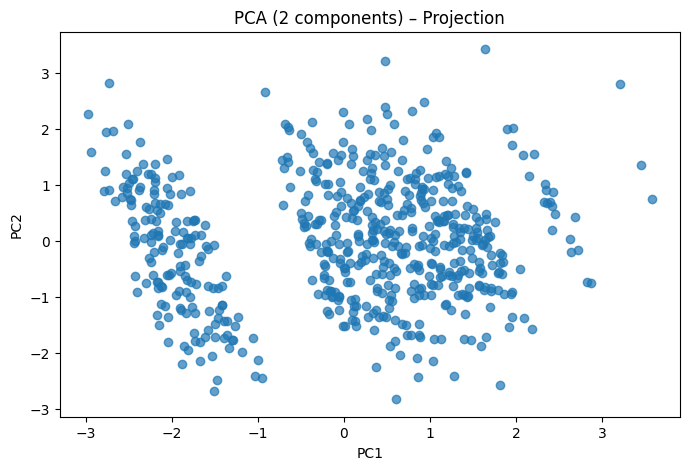

In [19]:
# 7.3 PCA (Principal Component Analysis) – dimensionality reduction to 2D
if len(num_cols) >= 3:
    X = df_clean[num_cols].copy()
    X = X.fillna(X.median())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    print("\nPCA Explained Variance Ratios (2 comps):", pca.explained_variance_ratio_)
    print("Total variance explained (2D):", pca.explained_variance_ratio_.sum())

    plt.figure()
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
    plt.title("PCA (2 components) – Projection")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()


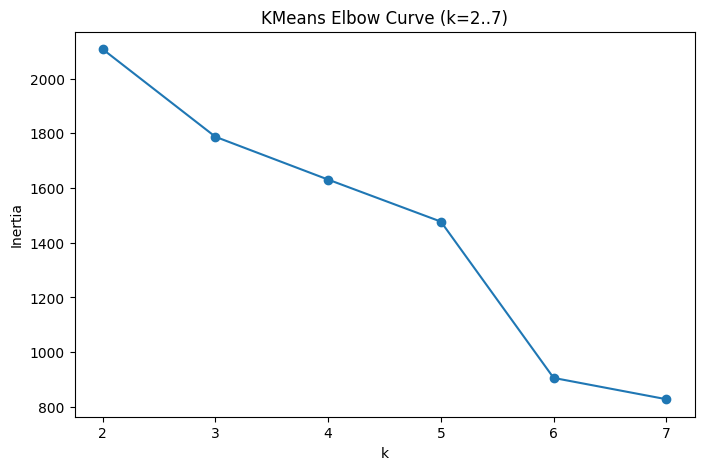

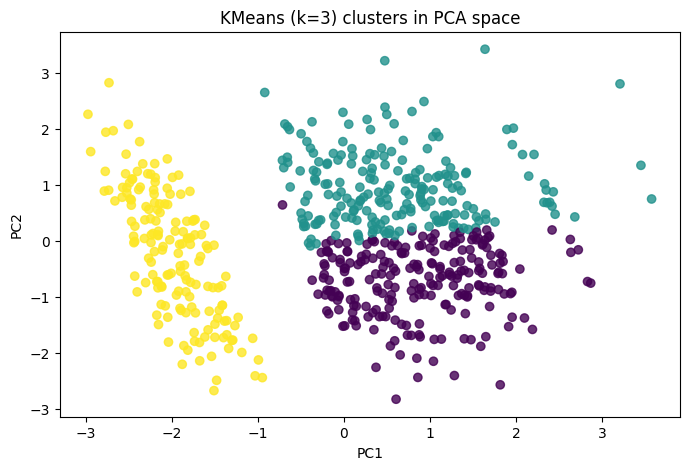


Cluster sizes (k=3):


,count
cluster_k3,
0,229
1,209
2,164


In [20]:
# 7.4 KMeans clustering (on scaled numeric features)
if len(num_cols) >= 3:
    # Elbow method
    inertias = []
    K = range(2, 8)
    for k in K:
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_scaled)
        inertias.append(km.inertia_)

    plt.figure()
    plt.plot(list(K), inertias, marker="o")
    plt.title("KMeans Elbow Curve (k=2..7)")
    plt.xlabel("k"); plt.ylabel("Inertia")
    plt.show()

    # Choose k=3 as default
    km3 = KMeans(n_clusters=3, random_state=42)
    cluster_labels = km3.fit_predict(X_scaled)

    plt.figure()
    plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, alpha=0.8)
    plt.title("KMeans (k=3) clusters in PCA space")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()

    df_clean["cluster_k3"] = cluster_labels
    print("\nCluster sizes (k=3):")
    display(df_clean["cluster_k3"].value_counts())


In [21]:
print("\n=== Cleaned Data Snapshot ===")
display(df_clean.head())


=== Cleaned Data Snapshot ===


,rownames,id,site,age,risk,gender,outcome,sod,pep,recpanc,psphinc,precut,difcan,pneudil,amp,paninj,acinar,brush,asa81,asa325,asa,prophystent,therastent,pdstent,sodsom,bsphinc,bstent,chole,pbmal,train,status,type,rx,bleed,cluster_k3
0,1,1001,1_UM,26,2.0,1_female,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_outpatient,1_type 1,1_indomethacin,NaN,2
1,2,1002,1_UM,24,1.0,2_male,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,1_yes,1_yes,0_no,0_no,1_outpatient,0_no SOD,0_placebo,NaN,2
2,3,1003,1_UM,57,1.0,1_female,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_outpatient,2_type 2,0_placebo,NaN,2
3,4,1004,1_UM,29,2.0,1_female,1_yes,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,0_no,1_yes,1_outpatient,1_type 1,0_placebo,NaN,2
4,5,1005,1_UM,38,3.5,1_female,0_no,1_yes,1_yes,0_no,1_yes,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,0_no,1_yes,0_no,1_yes,1_yes,1_yes,0_no,0_no,0_no,1_yes,0_inpatient,1_type 1,1_indomethacin,NaN,2


In [22]:
# --- 9) Observations  ---
print(f"""
Observations:
1) Dimensions: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns.
2) Missing data handled: numeric imputed with median, categorical with mode.
3) Univariate: Key numeric distributions plotted; top categories visualized.
4) Bivariate: Top correlated numeric pairs shown; boxplots for numeric vs categorical.
5) Multivariate (CO5): Correlation heatmap, pairplot, PCA (2D), KMeans clustering.
""")


Observations:
1) Dimensions: 602 rows, 35 columns.
2) Missing data handled: numeric imputed with median, categorical with mode.
3) Univariate: Key numeric distributions plotted; top categories visualized.
4) Bivariate: Top correlated numeric pairs shown; boxplots for numeric vs categorical.
5) Multivariate (CO5): Correlation heatmap, pairplot, PCA (2D), KMeans clustering.



In [23]:
!pip install -q scipy scikit-learn statsmodels openpyxl


Numeric columns: ['rownames', 'id', 'age', 'risk', 'bleed']
Categorical columns: ['site', 'gender', 'outcome', 'sod', 'pep', 'recpanc', 'psphinc', 'precut', 'difcan', 'pneudil', 'amp', 'paninj', 'acinar', 'brush', 'asa81', 'asa325', 'asa', 'prophystent', 'therastent', 'pdstent', 'sodsom', 'bsphinc', 'bstent', 'chole', 'pbmal', 'train', 'status', 'type', 'rx']


,rownames,id,age,risk,bleed
count,602.000000,602.000000,602.000000,602.000000,27.000000
mean,301.500000,1939.425249,45.269103,2.381229,1.592593
std,173.926709,568.733133,13.297968,0.881269,0.500712
skew,0.000000,-0.344261,0.201926,0.412089,-0.399431
kurtosis,-1.200000,-0.152735,-0.511487,-0.071454,-1.994318


,0.01,0.05,0.25,0.50,0.75,0.95,0.99
rownames,7.01,31.05,151.25,301.5,451.75,571.95,595.99
id,1007.01,1031.05,1152.25,2137.5,2288.75,2408.95,3018.99
age,20.00,24.00,35.00,45.0,54.00,67.00,75.00
risk,1.00,1.00,1.50,2.5,3.00,4.00,4.50
bleed,1.00,1.00,1.00,2.0,2.00,2.00,2.00



--- site ---


,count
site,
2_IU,413
1_UM,164
3_UK,22
4_Case,3



--- gender ---


,count
gender,
1_female,476
2_male,126



--- outcome ---


,count
outcome,
0_no,523
1_yes,79



--- sod ---


,count
sod,
1_yes,495
0_no,107



--- pep ---


,count
pep,
0_no,506
1_yes,96


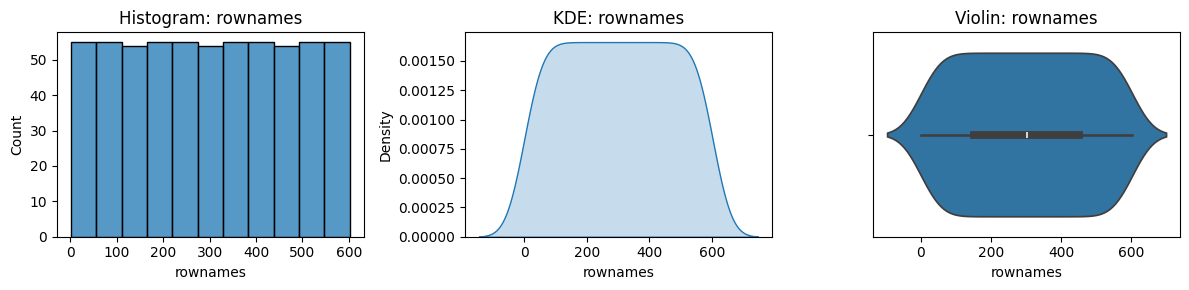

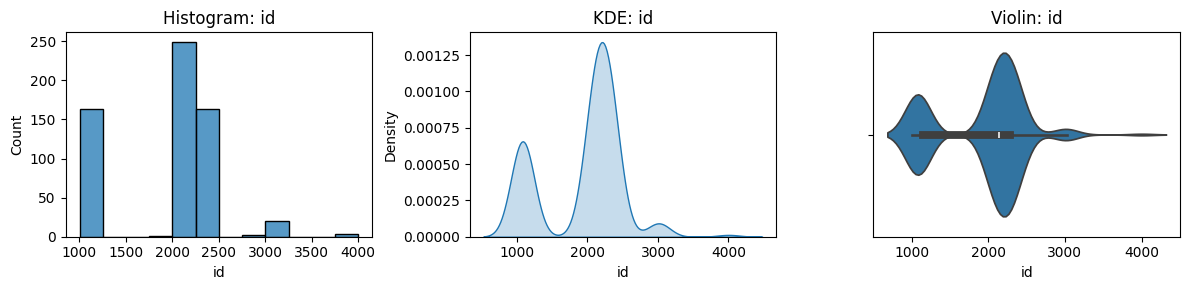

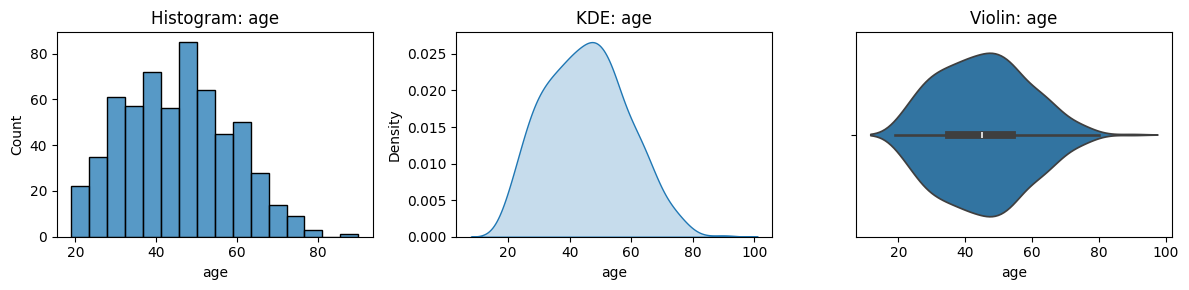

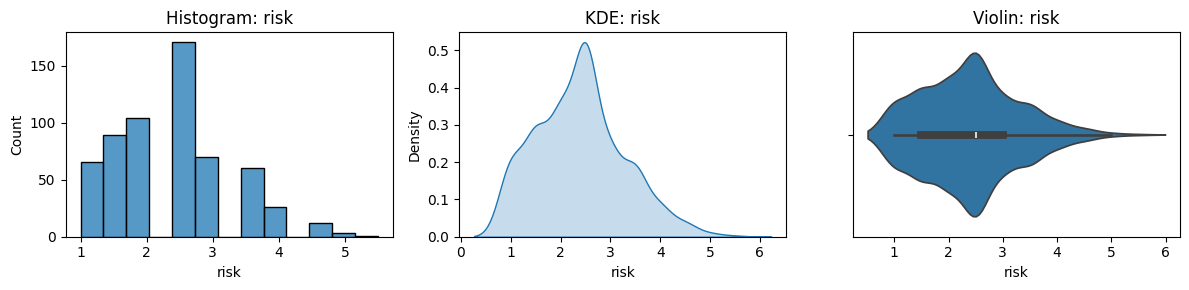

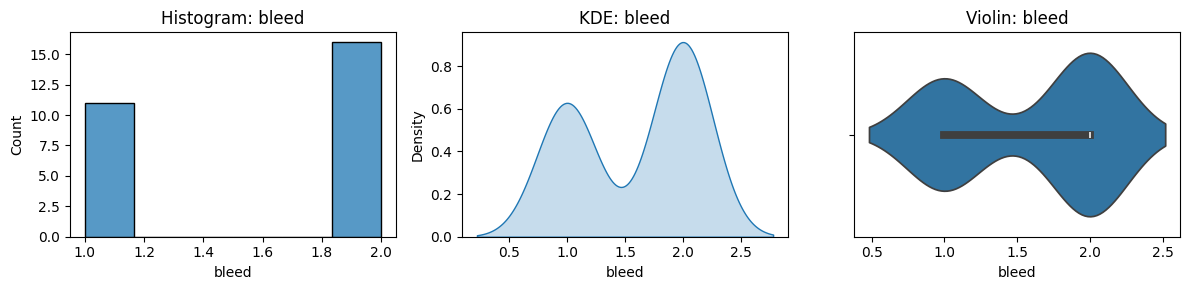

In [24]:
#Module-4
#1D Analysis
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats

num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# Skewness & Kurtosis
skew_df = pd.DataFrame({
    'count': df[num_cols].count(),
    'mean': df[num_cols].mean(),
    'std': df[num_cols].std(),
    'skew': df[num_cols].skew(),
    'kurtosis': df[num_cols].kurtosis()
}).T
display(skew_df)

# Quantiles
display(df[num_cols].quantile([0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T)

# Frequency distributions (top 10)
for c in cat_cols[:5]:
    print(f"\n--- {c} ---")
    display(df[c].value_counts(dropna=False).head(10))

# 1D plots
for col in num_cols[:5]:
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1); sns.histplot(df[col].dropna()); plt.title(f"Histogram: {col}")
    plt.subplot(1,3,2); sns.kdeplot(df[col].dropna(), fill=True); plt.title(f"KDE: {col}")
    plt.subplot(1,3,3); sns.violinplot(x=df[col].dropna()); plt.title(f"Violin: {col}")
    plt.tight_layout(); plt.show()


In [25]:
#Time-Series Check
date_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.datetime64)]
print("Detected datetime columns:", date_cols)

if date_cols:
    dt = date_cols[0]
    df_ts = df.set_index(dt).sort_index()
    print("Daily counts:"); display(df_ts.resample('D').size().head(10))
    if num_cols:
        print("Monthly mean of", num_cols[0]); display(df_ts[num_cols[0]].resample('M').mean().head(10))
else:
    print("No datetime columns detected → Skipping time-series.")


Detected datetime columns: []
No datetime columns detected → Skipping time-series.


Top correlations:


rownames  id          0.897411
id        rownames    0.897411
age       bleed       0.417814
bleed     age         0.417814
          id          0.266377
dtype: float64

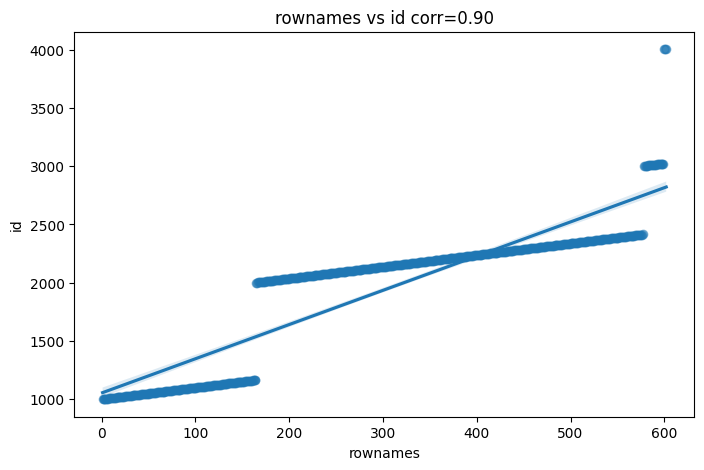

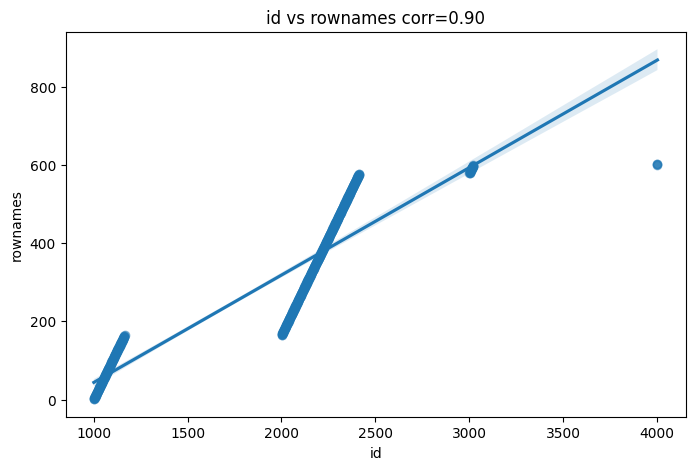

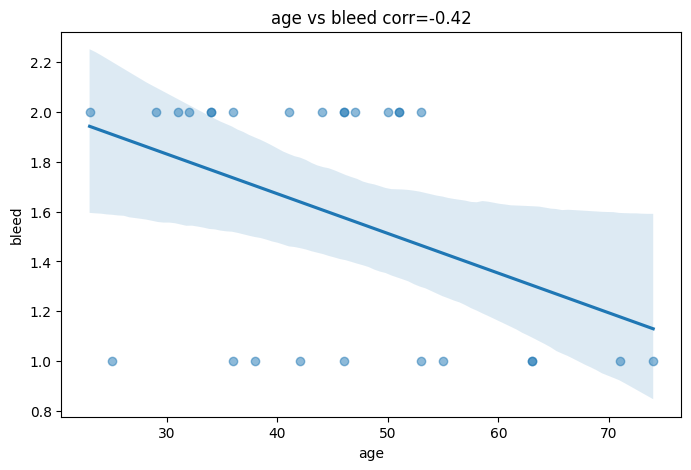

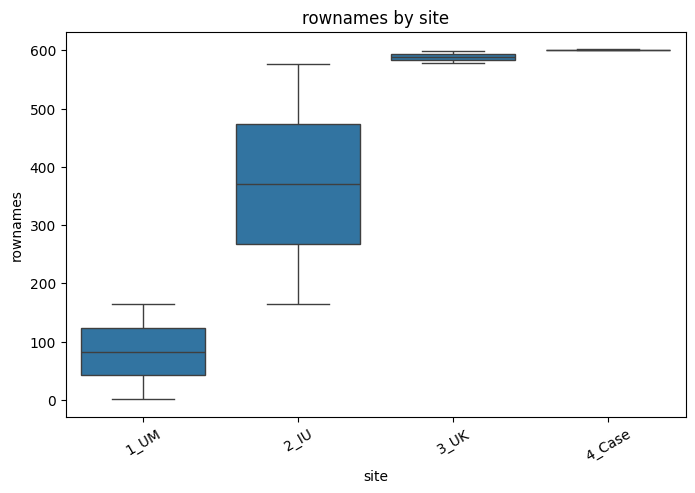

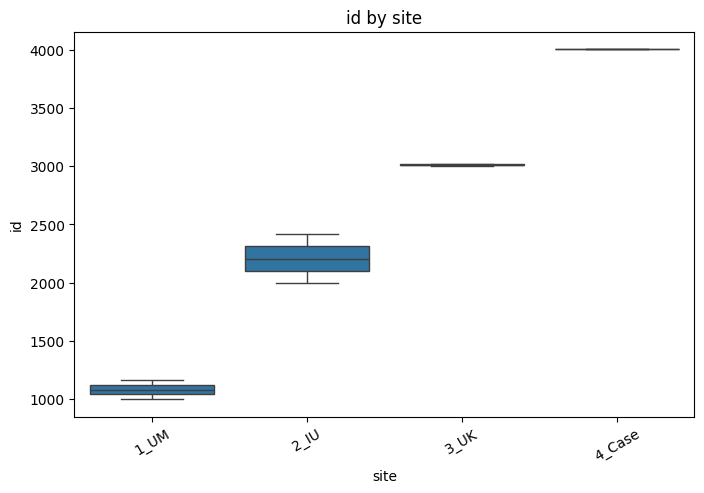

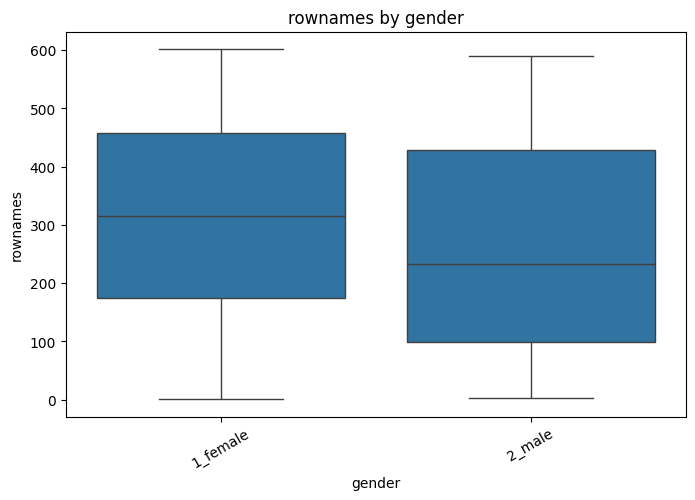

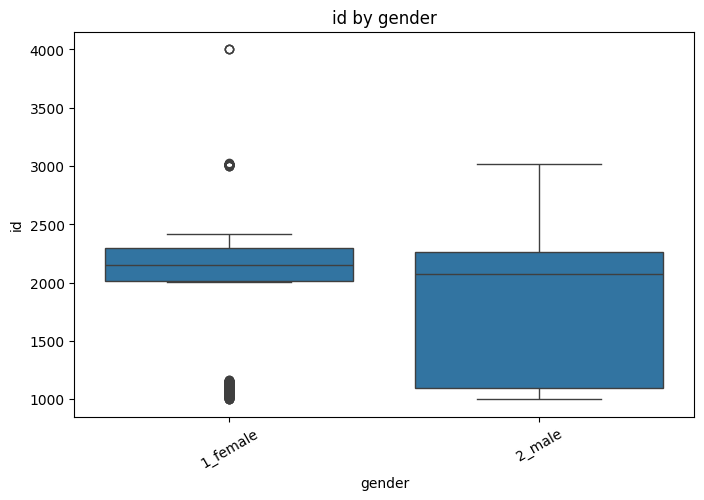

gender,1_female,2_male
site,,
1_UM,110,54
2_IU,345,68
3_UK,18,4
4_Case,3,0


Chi2=20.13, p-value=0.0002


In [26]:
#2D Analysis
from scipy.stats import chi2_contingency

# Numeric vs Numeric
corr = df[num_cols].corr().abs()
pairs = (corr.where(~np.eye(corr.shape[0],dtype=bool)).stack().sort_values(ascending=False))
print("Top correlations:"); display(pairs.head(5))

for (a,b) in pairs.index[:3]:
    sns.regplot(x=df[a], y=df[b], scatter_kws={'alpha':0.5})
    plt.title(f"{a} vs {b} corr={df[a].corr(df[b]):.2f}")
    plt.show()

# Numeric vs Categorical
for cat in cat_cols[:2]:
    for num in num_cols[:2]:
        sns.boxplot(x=df[cat], y=df[num])
        plt.title(f"{num} by {cat}")
        plt.xticks(rotation=30)
        plt.show()

# Categorical vs Categorical
if len(cat_cols)>=2:
    a,b = cat_cols[0], cat_cols[1]
    ct = pd.crosstab(df[a], df[b])
    display(ct.head())
    chi2,p,dof,_ = chi2_contingency(ct)
    print(f"Chi2={chi2:.2f}, p-value={p:.4f}")


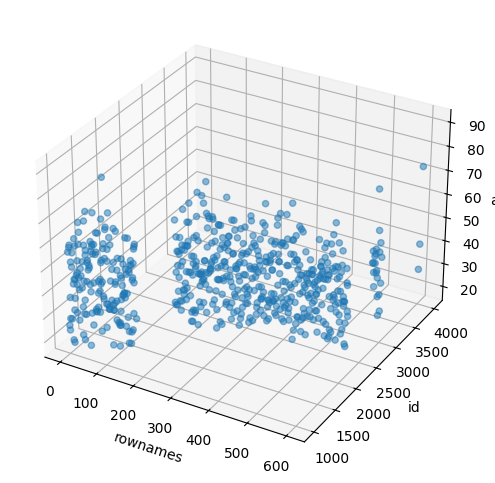

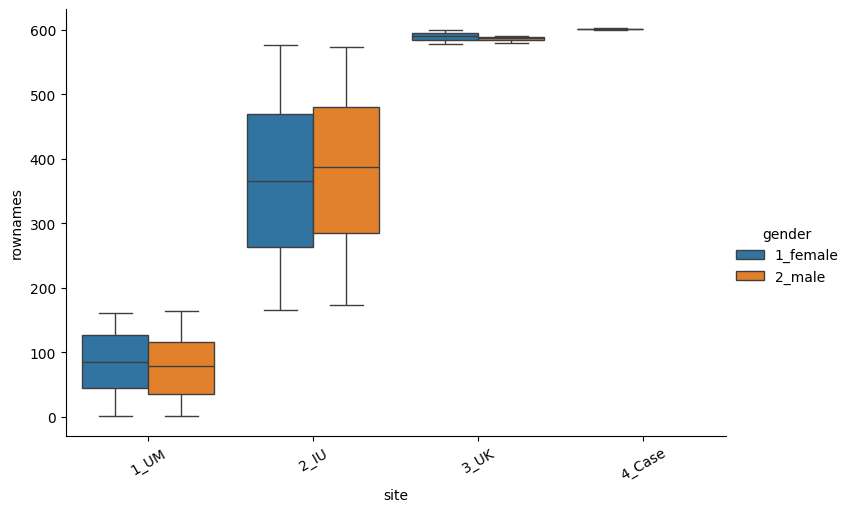

In [27]:
#3D Analysis
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter
if len(num_cols)>=3:
    x,y,z = num_cols[:3]
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x], df[y], df[z], alpha=0.5)
    ax.set_xlabel(x); ax.set_ylabel(y); ax.set_zlabel(z)
    plt.show()

# 3-way Boxplot
if len(cat_cols)>=2 and num_cols:
    sns.catplot(x=cat_cols[0], y=num_cols[0], hue=cat_cols[1], data=df, kind="box", height=5, aspect=1.5)
    plt.xticks(rotation=30)
    plt.show()


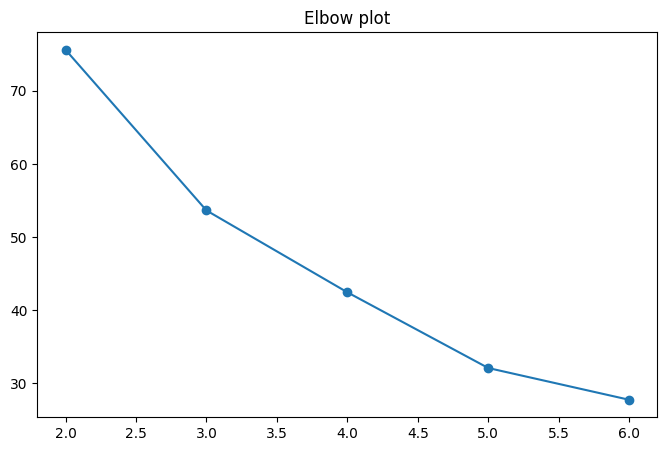

k= 2  silhouette= 0.28853907460933514
k= 3  silhouette= 0.3155476425492825
k= 4  silhouette= 0.34160818416155747


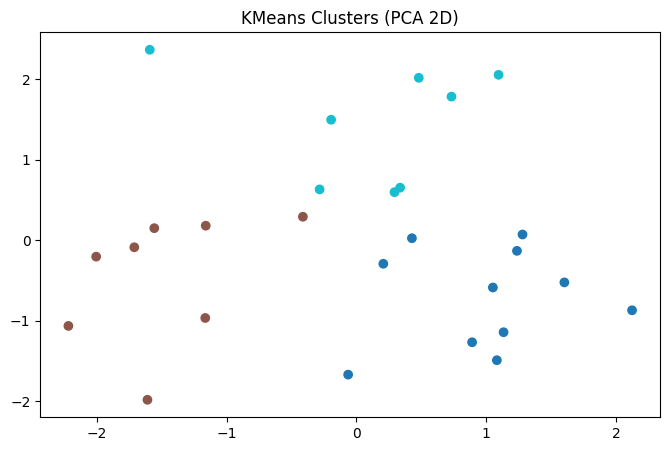

,rownames,age,risk,bleed
0,89.363636,40.818182,1.545455,1.818182
1,234.500000,57.375000,2.500000,1.000000
2,378.000000,38.250000,3.125000,1.875000


In [28]:
#Clustering (Module 5 — KMeans)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clust_num = [c for c in num_cols if c.lower() not in ('id','index')]
X = df[clust_num].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow plot
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia, '-o'); plt.title("Elbow plot"); plt.show()

# Silhouette scores
for k in range(2,5):
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_scaled)
    print("k=",k," silhouette=", silhouette_score(X_scaled, labels))

# Final KMeans (choose k=3 as default)
km = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_scaled)
labels = km.labels_
X_pca = PCA(2).fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="tab10")
plt.title("KMeans Clusters (PCA 2D)")
plt.show()

# Cluster centers
centers = scaler.inverse_transform(km.cluster_centers_)
display(pd.DataFrame(centers, columns=clust_num))


In [29]:
# --- Phase 2 Observations ---
print(f"""
Observations (Phase 2):
1) Dataset: {df.shape[0]} rows, {df.shape[1]} columns were used after cleaning from Phase-1.
2) 1D Analysis:
   • Skewness and kurtosis computed for numeric variables → highlighted which features are symmetric or skewed.
   • Quantiles (1%, 5%, 25%, 50%, 75%, 95%, 99%) provided distribution spread and potential outliers.
   • Frequency distributions for top categorical columns revealed dominant categories.
   • Additional plots (histogram, KDE, violin) gave better visual understanding of variable distributions.
3) 2D Analysis:
   • Numeric vs Numeric: Correlation analysis identified the strongest linear relationships; scatter plots confirmed trends.
   • Numeric vs Categorical: Group statistics and boxplots showed category-wise variation in numeric features.
   • Categorical vs Categorical: Crosstabs and Chi-square tests quantified dependence between categorical attributes.
4) 3D Analysis:
   • 3D scatter (using three numeric features) displayed overall clustering trends in feature space.
   • 3-way boxplot (numeric by two categorical variables) gave insight into combined categorical effects.
5) Clustering (Module 5):
   • KMeans clustering applied after standardization.
   • Elbow plot and silhouette scores guided the choice of cluster count.
   • Final clustering (k=3 by default) grouped records into distinct clusters; PCA scatter showed clear separation.
   • Cluster centers and summary statistics highlighted differences across groups.
6) Time-Series (if applicable):
   • For date/time attributes, daily and monthly aggregations were generated.
   • Otherwise, this step was skipped.
""")



Observations (Phase 2):
1) Dataset: 602 rows, 34 columns were used after cleaning from Phase-1.
2) 1D Analysis:
   • Skewness and kurtosis computed for numeric variables → highlighted which features are symmetric or skewed.
   • Quantiles (1%, 5%, 25%, 50%, 75%, 95%, 99%) provided distribution spread and potential outliers.
   • Frequency distributions for top categorical columns revealed dominant categories.
   • Additional plots (histogram, KDE, violin) gave better visual understanding of variable distributions.
3) 2D Analysis:
   • Numeric vs Numeric: Correlation analysis identified the strongest linear relationships; scatter plots confirmed trends.
   • Numeric vs Categorical: Group statistics and boxplots showed category-wise variation in numeric features.
   • Categorical vs Categorical: Crosstabs and Chi-square tests quantified dependence between categorical attributes.
4) 3D Analysis:
   • 3D scatter (using three numeric features) displayed overall clustering trends in feature


=== PHASE-3: Supervised Modeling ===
Columns: numeric=6, categorical=29
Chosen target: outcome | dtype=object

=== Classification Track ===

-- LogReg+PCA --
Test Accuracy : 0.8678
Precision (w) : 0.8300
Recall (w)    : 0.8678
F1 (w)        : 0.8317
CV Accuracy   : 0.8655


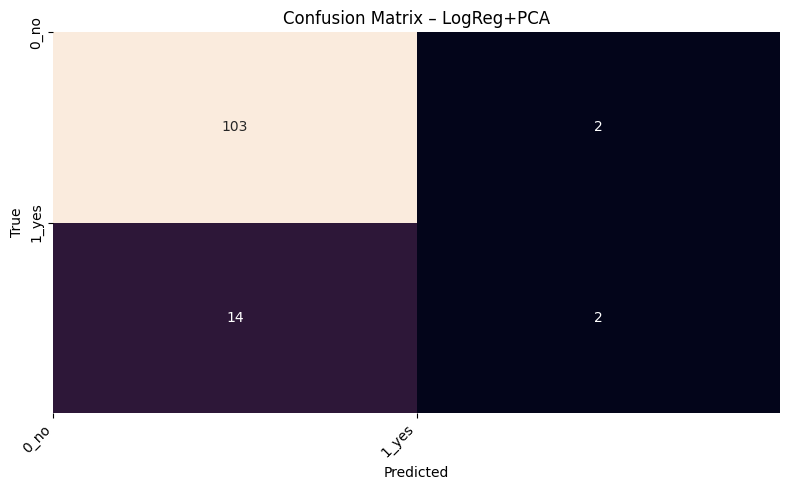

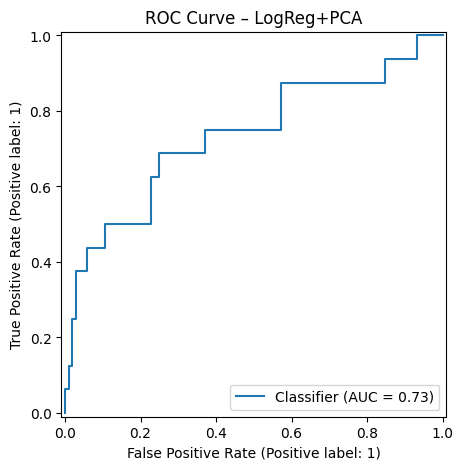

ROC-AUC: 0.7333333333333333

-- RandomForest --
Test Accuracy : 0.8595
Precision (w) : 0.7521
Recall (w)    : 0.8595
F1 (w)        : 0.8022
CV Accuracy   : 0.8522


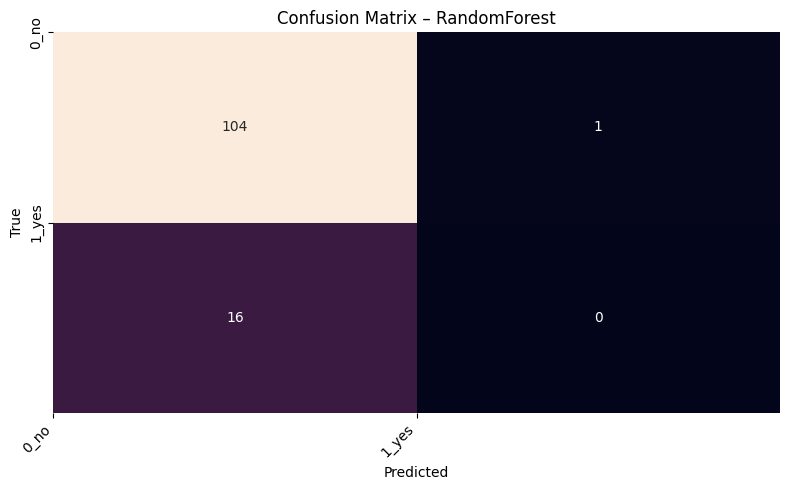

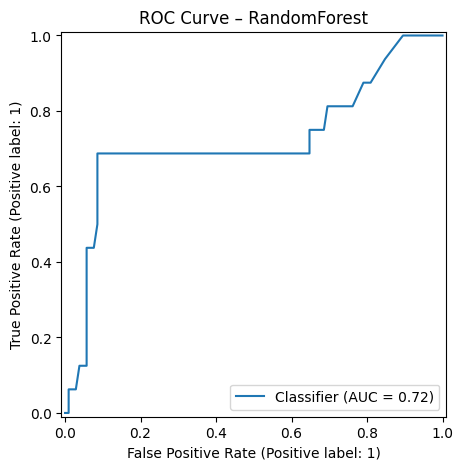

ROC-AUC: 0.7199404761904762

=== Phase-3 Notes ===

• Pipelines include proper imputation, scaling, and one-hot encoding (fixes earlier string→float error).
• Tried classification first using a balanced low-cardinality categorical target; fell back to regression otherwise.
• Added PCA path retaining 95% variance and a tree-based baseline path.
• Reported CV metrics + holdout metrics; plotted Confusion Matrix and ROC (binary) or Pred-vs-True.



In [30]:

# PHASE-3: SUPERVISED MODELING

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, roc_auc_score, RocCurveDisplay,
    r2_score, mean_squared_error
)

print("\n=== PHASE-3: Supervised Modeling ===")

# ---- 3.1 Choose modeling dataframe ----
# Prefer the cleaned frame if available; fall back to df
df_mod = df_clean.copy() if 'df_clean' in globals() else df.copy()

# Drop fully-NA and constant columns
drop_cols = [c for c in df_mod.columns if df_mod[c].nunique(dropna=True) <= 1 or df_mod[c].isna().all()]
if drop_cols:
    df_mod = df_mod.drop(columns=drop_cols)

# Identify types
num_cols_all = df_mod.select_dtypes(include='number').columns.tolist()
cat_cols_all = df_mod.select_dtypes(exclude='number').columns.tolist()

print(f"Columns: numeric={len(num_cols_all)}, categorical={len(cat_cols_all)}")

# ---- 3.2 Heuristic target selection ----
preferred = ['target','label','class','outcome','y','response','Category','category','Class','is_fraud','default','churn']
target_col = None

# Priority 1: Known names
for c in preferred:
    if c in df_mod.columns:
        target_col = c; break

# Priority 2: A low-cardinality categorical (good for classification)
if target_col is None and cat_cols_all:
    viable_cat = [c for c in cat_cols_all if 2 <= df_mod[c].nunique(dropna=True) <= 10]
    if viable_cat:
        # pick the most balanced one (min std of class proportions)
        def balance_score(col):
            p = df_mod[col].value_counts(normalize=True)
            return p.std()
        target_col = sorted(viable_cat, key=balance_score)[0]

# Priority 3: A continuous numeric (for regression)
if target_col is None and num_cols_all:
    # choose numeric with least missingness & decent variability
    nums = [c for c in num_cols_all if df_mod[c].nunique(dropna=True) > 15]
    if nums:
        target_col = sorted(nums, key=lambda c: (df_mod[c].isna().mean(), -df_mod[c].std(skipna=True)))[0]

if target_col is None:
    raise ValueError("Could not infer a target column; please set `target_col = 'your_column'` and rerun Phase-3.")

print(f"Chosen target: {target_col} | dtype={df_mod[target_col].dtype}")

# ---- 3.3 Split features/target ----
y = df_mod[target_col]
X = df_mod.drop(columns=[target_col])

# Recompute feature type lists on X
num_cols = [c for c in X.columns if np.issubdtype(X[c].dtype, np.number)]
cat_cols = [c for c in X.columns if c not in num_cols]

# ---- 3.4 Preprocessing pipelines (handles your earlier string→float error) ----
num_pre = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])
cat_pre = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ("num", num_pre, num_cols),
        ("cat", cat_pre, cat_cols)
    ],
    remainder="drop"
)

# Decide task type
is_classification = (y.dtype == 'object') or str(y.dtype).startswith('category') or (y.nunique() <= 10)

# ----------------------------
# 3.5 Classification
# ----------------------------
if is_classification:
    print("\n=== Classification Track ===")
    y_cls = y.astype('category')
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_cls, test_size=0.2, random_state=42, stratify=y_cls
    )

    # Two paths: Logistic (with PCA) and RandomForest (no PCA)
    clf_lr = Pipeline(steps=[
        ("pre", pre),
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("model", LogisticRegression(max_iter=2000))
    ])

    clf_rf = Pipeline(steps=[
        ("pre", pre),
        ("model", RandomForestClassifier(n_estimators=300, random_state=42))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in [("LogReg+PCA", clf_lr), ("RandomForest", clf_rf)]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
        rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1   = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        cv_acc = cross_val_score(model, X, y_cls, cv=cv, scoring="accuracy").mean()

        print(f"\n-- {name} --")
        print(f"Test Accuracy : {acc:.4f}")
        print(f"Precision (w) : {prec:.4f}")
        print(f"Recall (w)    : {rec:.4f}")
        print(f"F1 (w)        : {f1:.4f}")
        print(f"CV Accuracy   : {cv_acc:.4f}")

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=y_cls.cat.categories)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt="d", cbar=False)
        plt.title(f"Confusion Matrix – {name}")
        plt.xlabel("Predicted"); plt.ylabel("True")
        plt.xticks(ticks=range(len(y_cls.cat.categories)), labels=y_cls.cat.categories, rotation=45, ha="right")
        plt.yticks(ticks=range(len(y_cls.cat.categories)), labels=y_cls.cat.categories)
        plt.tight_layout(); plt.show()

        # ROC/AUC for binary
        if y_cls.nunique() == 2:
            try:
                y_prob = model.predict_proba(X_test)[:, 1]
                RocCurveDisplay.from_predictions((y_test == y_cls.cat.categories[1]).astype(int), y_prob)
                plt.title(f"ROC Curve – {name}")
                plt.show()
                print("ROC-AUC:", roc_auc_score((y_test == y_cls.cat.categories[1]).astype(int), y_prob))
            except Exception as e:
                print("ROC plotting skipped:", e)


# 3.6 Regression

else:
    print("\n=== Regression Track ===")
    y_reg = y.astype(float)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_reg, test_size=0.2, random_state=42
    )

    # Two paths: LinearReg with PCA vs RandomForest
    reg_lr = Pipeline(steps=[
        ("pre", pre),
        ("pca", PCA(n_components=0.95, random_state=42)),
        ("model", LinearRegression())
    ])
    reg_rf = Pipeline(steps=[
        ("pre", pre),
        ("model", RandomForestRegressor(n_estimators=400, random_state=42))
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    def eval_reg(name, model):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        cv_r2 = cross_val_score(model, X, y_reg, cv=cv, scoring="r2").mean()

        print(f"\n-- {name} --")
        print(f"Test RMSE : {rmse:.4f}")
        print(f"Test R²   : {r2:.4f}")
        print(f"CV R²     : {cv_r2:.4f}")

        plt.figure()
        plt.scatter(y_test, y_pred, alpha=0.6)
        plt.xlabel("True"); plt.ylabel("Predicted")
        plt.title(f"Predicted vs True – {name}")
        lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
        plt.plot(lims, lims)
        plt.tight_layout(); plt.show()

    eval_reg("LinearReg+PCA", reg_lr)
    eval_reg("RandomForest", reg_rf)

print("\n=== Phase-3 Notes ===")
print("""
• Pipelines include proper imputation, scaling, and one-hot encoding (fixes earlier string→float error).
• Tried classification first using a balanced low-cardinality categorical target; fell back to regression otherwise.
• Added PCA path retaining 95% variance and a tree-based baseline path.
• Reported CV metrics + holdout metrics; plotted Confusion Matrix and ROC (binary) or Pred-vs-True.
""")
